<a href="https://colab.research.google.com/github/ganesh-207/Artificial-Intelligence/blob/main/MultiClass_Classification_with_Keras_with_BatchNormalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import pandas as pd
df = pd.read_csv(r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/mobile_train%20(1).csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df['price_range'].unique()

array([1, 2, 3, 0])

## Perform basic data quality cheks

In [5]:
df.isna().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.shape

(2000, 21)

## Separate The data X and Y

In [8]:
X = df.drop(columns='price_range')
Y = df[['price_range']]

In [9]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [10]:
Y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


## Data Cleaning and Data Preprocessing

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [12]:
num_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
).set_output(transform='pandas')

In [13]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


## Split the data into training and testing

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.80,random_state=42)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape,sep='\t')

(1600, 20)	(400, 20)	(1600, 1)	(400, 1)


## Convert y data into categorical data-preprocessing the Y data

In [15]:
ytrain['price_range'].unique()

array([1, 2, 0, 3])

In [16]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [17]:
ytrain_cat[:1]

array([[0., 1., 0., 0.]])

In [18]:
ytest_cat[:1]

array([[1., 0., 0., 0.]])

## Model building

In [19]:
from keras.models import Sequential
from keras.layers import Input,Dense,Dropout,BatchNormalization
from keras.callbacks import EarlyStopping

In [20]:
model = Sequential()

## Add the input layer
model.add(Input(shape=(xtrain.shape[1],)))

## Add the Dense layer-Hidden layers1
model.add(Dense(units=32,activation='relu'))

## Add the BatchNormalization layer1
model.add(BatchNormalization())

## Add the Dense layer-Hidden layers2
model.add(Dense(units=16,activation='relu'))

## Add the BatchNormalization layer2
model.add(BatchNormalization())

## Add the output layer
model.add(Dense(units=ytrain_cat.shape[1],activation='softmax'))

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,460 (5.70 KB)

 Trainable params: 1,364 (5.33 KB)

 Non-trainable params: 96 (384.00 B)

In [22]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
es = EarlyStopping(monitor='val_loss',patience=10)

In [24]:
nn = model.fit(xtrain,ytrain_cat,epochs=200,validation_split=0.25,callbacks=[es])

Epoch 1/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.2339 - loss: 1.8998 - val_accuracy: 0.2700 - val_loss: 1.4299
Epoch 2/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2885 - loss: 1.5691 - val_accuracy: 0.3300 - val_loss: 1.3401
Epoch 3/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3924 - loss: 1.2943 - val_accuracy: 0.4450 - val_loss: 1.2438
Epoch 4/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4602 - loss: 1.1603 - val_accuracy: 0.5200 - val_loss: 1.1415
Epoch 5/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5514 - loss: 1.0209 - val_accuracy: 0.5500 - val_loss: 1.0423
Epoch 6/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6171 - loss: 0.9156 - val_accuracy: 0.5800 - val_loss: 0.9454
Epoch 7/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6764 - loss: 0.8352 - val_accuracy: 0.6100 - val_loss: 0.8588
Epoch 8/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7120 - loss: 0.7739 - val_accuracy: 0.6600 

## Learning Curve

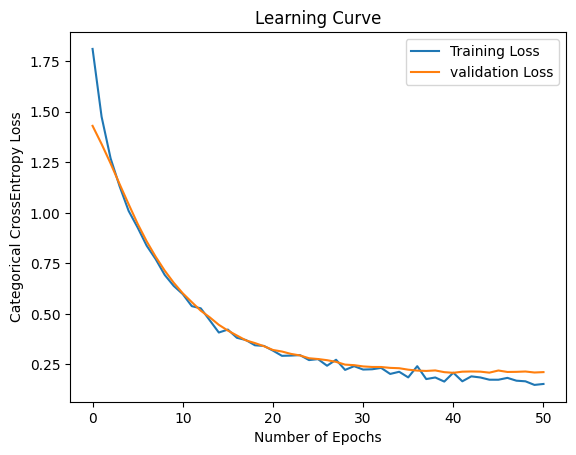

In [25]:
import matplotlib.pyplot as plt
plt.plot(nn.history['loss'],label='Training Loss')
plt.plot(nn.history['val_loss'],label='validation Loss')
plt.legend()
plt.title('Learning Curve')
plt.xlabel('Number of Epochs')
plt.ylabel('Categorical CrossEntropy Loss')
plt.show()

## Evaluate the model

In [26]:
model.evaluate(xtest,ytest_cat)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9157 - loss: 0.2177 


[0.21060727536678314, 0.9175000190734863]

In [27]:
model.evaluate(xtest,ytest_cat)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9157 - loss: 0.2177 


[0.21060727536678314, 0.9175000190734863]

## Save the model for final out of sample predication

In [28]:
model.save('MobilePrice.keras')

## Load The Model

In [29]:
from keras.models import load_model
m1 = load_model('/content/MobilePrice.keras')
m1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,190 (16.37 KB)

 Trainable params: 1,364 (5.33 KB)

 Non-trainable params: 96 (384.00 B)

 Optimizer params: 2,730 (10.67 KB)

In [30]:
ytrain['price_range'].unique()

array([1, 2, 0, 3])

In [31]:
ypreds_test = m1.predict(xtest)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [32]:
import numpy as np
final_ypreds_test = np.argmax(ypreds_test,axis=1)
final_ypreds_test[:10]

array([0, 2, 1, 3, 1, 1, 1, 0, 3, 1])

In [33]:
from sklearn.metrics import accuracy_score
ac_sc = accuracy_score(ytest,final_ypreds_test)
ac_sc

0.9175

## Check the confusion matrix and classification reports as well

In [34]:
ytest_cat[0]

array([1., 0., 0., 0.])

In [35]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [36]:
print(classification_report(ytest,final_ypreds_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       105
           1       0.88      0.91      0.90        91
           2       0.87      0.83      0.85        92
           3       0.94      0.94      0.94       112

    accuracy                           0.92       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.92      0.92      0.92       400



## Out of sample predication

In [37]:
xnew = pd.read_csv(r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/mobile_test%20(1).csv')
xnew.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [38]:
xnew2 = xnew.drop(columns='id')
xnew_pre = num_pipe.transform(xnew2)
final_preds = m1.predict(xnew_pre)
final_preds[:5]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[1.7851300e-03, 8.6958818e-05, 1.9465148e-01, 8.0347645e-01],
       [3.7733789e-05, 1.6811950e-05, 3.0906165e-03, 9.9685490e-01],
       [1.4523344e-04, 5.0841998e-03, 9.1908932e-01, 7.5681232e-02],
       [2.5548950e-06, 2.1580149e-08, 2.6332954e-04, 9.9973410e-01],
       [5.9786733e-05, 9.7548592e-01, 2.4444416e-02, 9.8922574e-06]],
      dtype=float32)

In [39]:
final_preds2 = np.argmax(final_preds,axis=1)
final_preds2[:10]

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0])

In [40]:
xnew['Mobile Price Range Predictions'] = final_preds2
xnew.to_csv('Prediction.csv',index=False)